In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def calculate_liquidity_gap(assets, liabilities):
    liquidity_gap = assets - liabilities
    return liquidity_gap

# Set the stock ticker and date range
ticker = 'EURMAD=X'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch stock data using yfinance
stock_prices = fetch_stock_data(ticker, start_date, end_date)

# Assuming assets and liabilities are based on stock prices
assets = stock_prices.shift(-1)  # Assume assets are tomorrow's closing prices
liabilities = stock_prices          # Assume liabilities are today's closing prices

# Create a DataFrame
df = pd.DataFrame({'Assets': assets, 'Liabilities': liabilities})

# Calculate liquidity gap
df['Liquidity Gap'] = calculate_liquidity_gap(df['Assets'], df['Liabilities'])


[*********************100%%**********************]  1 of 1 completed


In [17]:
df.dropna()

,Assets,Liabilities,Liquidity Gap
Date,,,
2023-01-02,10.8244,10.8170,0.007400
2023-01-03,10.7521,10.8244,-0.072300
2023-01-04,10.7367,10.7521,-0.015400
2023-01-05,10.6861,10.7367,-0.050600
2023-01-06,10.5931,10.6861,-0.093000
...,...,...,...
2023-12-15,10.7298,10.7113,0.018500
2023-12-18,10.6949,10.7298,-0.034901
2023-12-19,10.7109,10.6949,0.016001


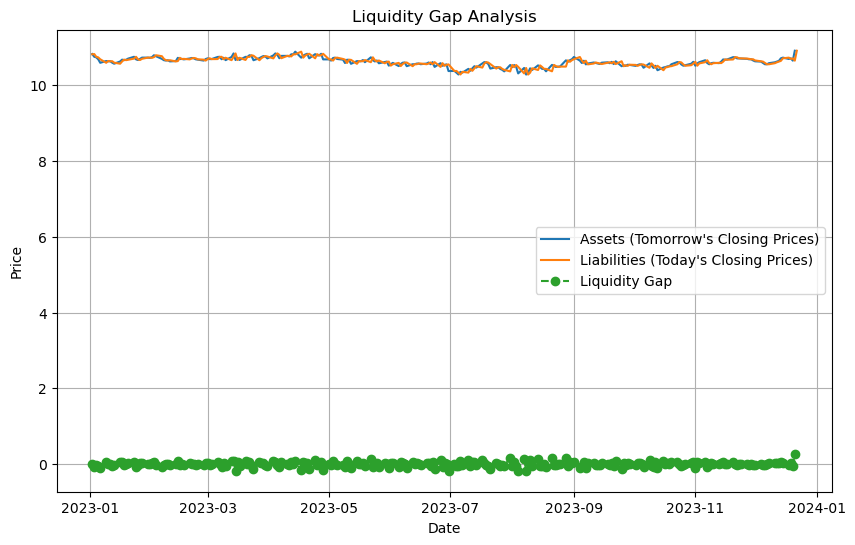

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Assets'], label='Assets (Tomorrow\'s Closing Prices)')
plt.plot(df['Liabilities'], label='Liabilities (Today\'s Closing Prices)')
plt.plot(df['Liquidity Gap'], label='Liquidity Gap', linestyle='--', marker='o')

plt.title('Liquidity Gap Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Liquidity Risk 

In [23]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

def calculate_liquidity_ratio(liquid_assets, current_liabilities):
    liquidity_ratio = liquid_assets / current_liabilities
    return liquidity_ratio

# Set the stock ticker and date range
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

# Fetch stock data using yfinance
stock_prices = fetch_stock_data(ticker, start_date, end_date)

# Assuming liquid assets and current liabilities are based on stock prices
liquid_assets = stock_prices.shift(-1)  # Assume liquid assets are tomorrow's closing prices
current_liabilities = stock_prices       # Assume current liabilities are today's closing prices

# Create a DataFrame
df = pd.DataFrame({'Liquid Assets': liquid_assets, 'Current Liabilities': current_liabilities})

# Calculate liquidity ratio
df['Liquidity Ratio'] = calculate_liquidity_ratio(df['Liquid Assets'], df['Current Liabilities'])

[*********************100%%**********************]  1 of 1 completed


In [24]:
df.tail()

,Liquid Assets,Current Liabilities,Liquidity Ratio
Date,,,
2023-12-18,196.940002,195.889999,1.005360
2023-12-19,194.830002,196.940002,0.989286
2023-12-20,194.679993,194.830002,0.999230
2023-12-21,193.600006,194.679993,0.994453
2023-12-22,NaN,193.600006,NaN


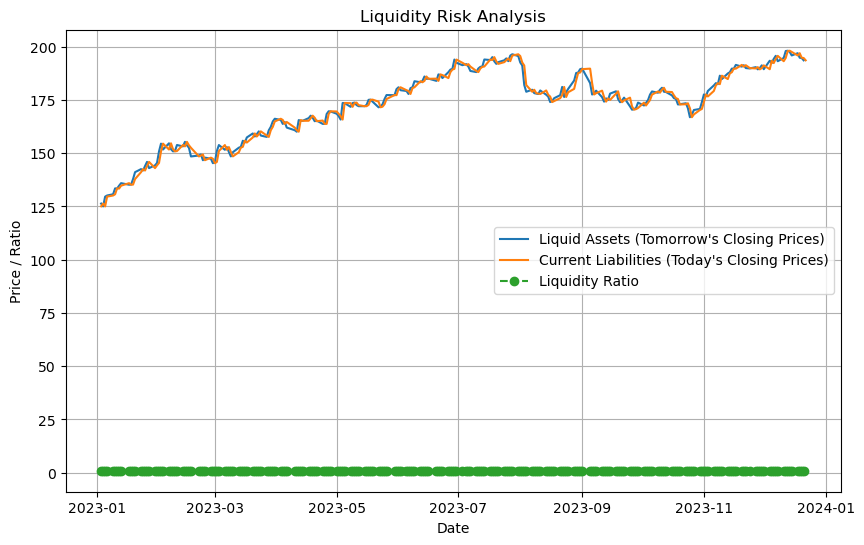

In [25]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Liquid Assets'], label='Liquid Assets (Tomorrow\'s Closing Prices)')
plt.plot(df['Current Liabilities'], label='Current Liabilities (Today\'s Closing Prices)')
plt.plot(df['Liquidity Ratio'], label='Liquidity Ratio', linestyle='--', marker='o')

plt.title('Liquidity Risk Analysis')
plt.xlabel('Date')
plt.ylabel('Price / Ratio')
plt.legend()
plt.grid(True)
plt.show()